## Bibliotecas

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import animation
from sys import argv

![anim gif](saidateste.gif)

## Definições do agente, ambiente, e algorito de aprendizado

In [2]:
class Agente():
    
    def __init__(self, N, ambiente_, iteracoes, taxa_aprendizado, fator_desconto, recompensa_, epsilon):
    
        self.tabela_q = np.zeros((N,N,4))
        self.ambiente = ambiente_
        self.num_iteracoes = iteracoes
        self.taxa = taxa_aprendizado
        self.desconto = fator_desconto
        self.recompensa = recompensa_
        self.eps = epsilon
       
        posicao_maxima = np.argmax(ambiente_)
        linha = posicao_maxima // N
        coluna = posicao_maxima % N
        
        self.posicao_inicial = [linha, coluna]
        self.evolucao = []
    
    def executar_acao(self, acao, posicao):
        
        linha, coluna = posicao
        nova_posicao = posicao.copy()
        
        if acao == 0: 
            nova_posicao[0] = linha - 1
        elif acao == 1: 
            nova_posicao[1] = coluna + 1
        elif acao == 2:
            nova_posicao[0] = linha + 1
        elif acao == 3:
            nova_posicao[1] = coluna - 1

        if nova_posicao[0] < 0 or nova_posicao[0] >= self.ambiente.shape[0] or nova_posicao[1] < 0 or nova_posicao[1] >= self.ambiente.shape[1]:
            return posicao, self.recompensa

        valor_ambiente = self.ambiente[nova_posicao[0], nova_posicao[1]]

        if valor_ambiente == -1:
            return posicao, self.recompensa
        elif valor_ambiente == 7:
            return nova_posicao, 1
        elif valor_ambiente == 4:
            return nova_posicao, -1
        else:
            return nova_posicao, self.recompensa

    def explorar_ambiente(self):
        
        s = self.posicao_inicial
        
        self.evolucao.append(self.ambiente.copy())
        ambiente_atual = self.ambiente.copy()
        
        for i in range(self.num_iteracoes):
            
            if np.random.random() < self.eps:
                acao = np.random.randint(0, 4)
                
            else:
                
                acao = np.argmax(self.tabela_q[s[0], s[1]])
                escorregou = np.random.random()
                
                if escorregou < 0.10:
                    acao = (acao-1)%4
                    
                elif escorregou > 0.90:
                    acao = (acao+1)%4
                    
            s_nova, recompensa_estado = self.executar_acao(acao, s)
            
            self.tabela_q[s[0], s[1], acao] += self.taxa * (recompensa_estado +
                                               self.desconto * np.max(self.tabela_q[s_nova[0], s_nova[1]]) -
                                               self.tabela_q[s[0], s[1], acao])
            
            ambiente_atual[s[0], s[1]] = 0
            ambiente_atual[s_nova[0], s_nova[1]] = 10.0
            self.evolucao.append(ambiente_atual.copy())
            
            s = s_nova
            
            if recompensa_estado == -1 or recompensa_estado == 1:
                
                s = self.posicao_inicial
                ambiente_atual = self.ambiente.copy()
                self.evolucao.append(ambiente_atual.copy())
    
        
    def gerar_gif(self):

        N = self.ambiente.shape[0]
        fig = plt.figure()

        #NxN é o tamanho da matriz em questão
        def init(N):
            sns.heatmap(np.zeros((N, N)), square = True, cbar = False)

        def animate(i):
            data = data_list[i]
            sns.heatmap(data, square = True, cbar = False)

        #Lista de arrays 10x10
        data_list = self.evolucao
        #PREENCHA A LISTA

        anim = animation.FuncAnimation(fig, animate, init_func = init(N), frames = len(data_list), repeat = False)
        pillowwriter = animation.PillowWriter(fps = 7)

        # filename é o nome do arquivo a ser salvo. É necessário que a extensão seja ".gif"
        anim.save('saidateste.gif', writer = pillowwriter)
        
    
    def gerar_imagem(self):
        
        N = self.ambiente.shape[0]
        
        labels = [["n" if self.ambiente[i, j] == -1 else
                   "n" if self.ambiente[i, j] == 4 else
                   "n" if self.ambiente[i, j] == 7 else
                   "c" if np.argmax(self.tabela_q[i, j]) == 0 else
                   "b" if np.argmax(self.tabela_q[i, j]) == 2 else
                   "e" if np.argmax(self.tabela_q[i, j]) == 3 else
                   "d" if np.argmax(self.tabela_q[i, j]) == 1 else ""
                   for j in range(N)] for i in range(N)]
        
        data = [[0 if self.ambiente[i, j] == -1 else
                 -1 if self.ambiente[i, j] == 4 else
                 1 if self.ambiente[i, j] == 7 else
                 np.max(self.tabela_q[i, j]) for j in range(N)] for i in range(N)]

        # Gerar o heatmap com as melhores ações
        sns.heatmap(data, cbar=True, square=True, annot=labels, fmt='', cmap="viridis")

        # Salvar a imagem como um arquivo PNG
        plt.savefig("saidateste_acoes.png")

## Leitura dos parâmetros de execução

In [3]:
def ler_arquivo(caminho_arquivo):
    
    arq =  open(caminho_arquivo, 'r')
    linhas = arq.readlines()
    arq.close()

    parametros = linhas[0].split()
    
    if len(parametros) == 5:
        iteracoes, alpha, gamma, recompensa, epsilon = map(float, parametros)
        
    else:
        iteracoes, alpha, gamma, recompensa = map(float, parametros)
        epsilon = -1
    
    N = int(linhas[1])
    descricao_ambiente = []
    
    for linha in linhas[2:]:
        dados = list(map(float, linha.split()))
        descricao_ambiente.append(dados)

    return iteracoes, alpha, gamma, recompensa, epsilon, N, np.array(descricao_ambiente)

## Execução

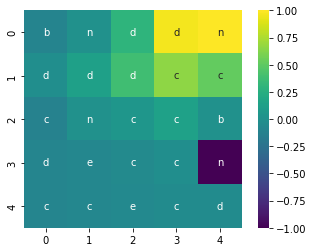

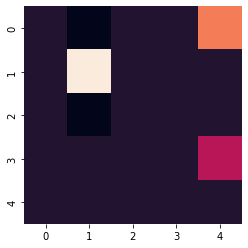

In [31]:
if __name__ == "__main__":

    caminho = 'input.txt' 

    iteracoes, taxa_aprendizado, desconto, recompensa, epsilon, N, ambiente = ler_arquivo(caminho)
    iteracoes = int(1000)
    
    agente = Agente(N, ambiente, iteracoes, taxa_aprendizado, desconto, recompensa, epsilon)
    agente.explorar_ambiente()
    agente.gerar_imagem()
    agente.gerar_gif()